# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Carlis Belvin Waruwu]
- **Email:** [carlisbelvinwaruwu@gmail.com]
- **ID Dicoding:** [carlis_belvin]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Faktor apa saja yang memengaruhi jumlah penyewaan sepeda harian?
- Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan musim atau hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

In [6]:
day_data = pd.read_csv("/content/sample_data/day.csv")
hour_data = pd.read_csv("/content/sample_data/hour.csv")

# Menampilkan beberapa baris pertama
print("Dataset Harian:")
print(day_data.head())
print("\nDataset Per Jam:")
print(hour_data.head())

Dataset Harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Dataset P

**Insight:**
- Dataset harian memiliki data agregasi per hari, sedangkan dataset per jam lebih detail.
- Kedua dataset mencakup atribut seperti tanggal, musim, cuaca, dan jumlah penyewaan sepeda.

### Assessing Data

In [7]:
# Informasi dasar dataset
print(day_data.info())
print(hour_data.info())

# Cek data yang hilang
print("Data hilang pada day.csv:", day_data.isnull().sum())
print("Data hilang pada hour.csv:", hour_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Tidak ditemukan data yang hilang pada kedua dataset.
- Dataset memiliki struktur yang konsisten dengan deskripsi.

### Cleaning Data

In [8]:
# Menambahkan label musim dan cuaca
day_data['season_label'] = day_data['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})
hour_data['season_label'] = hour_data['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

day_data['weather_label'] = day_data['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
})
hour_data['weather_label'] = hour_data['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
})


**Insight:**
- Label untuk musim dan cuaca ditambahkan untuk mempermudah analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

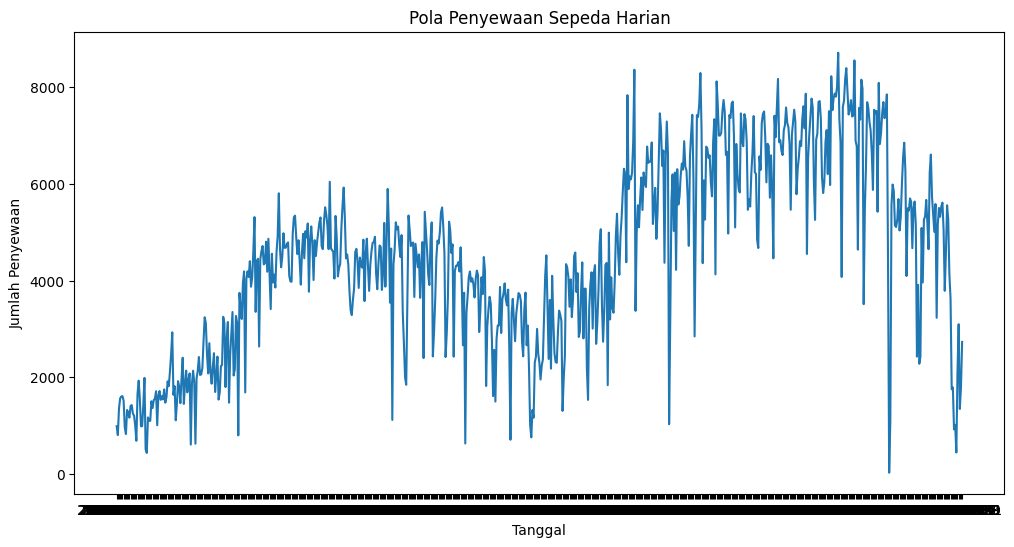

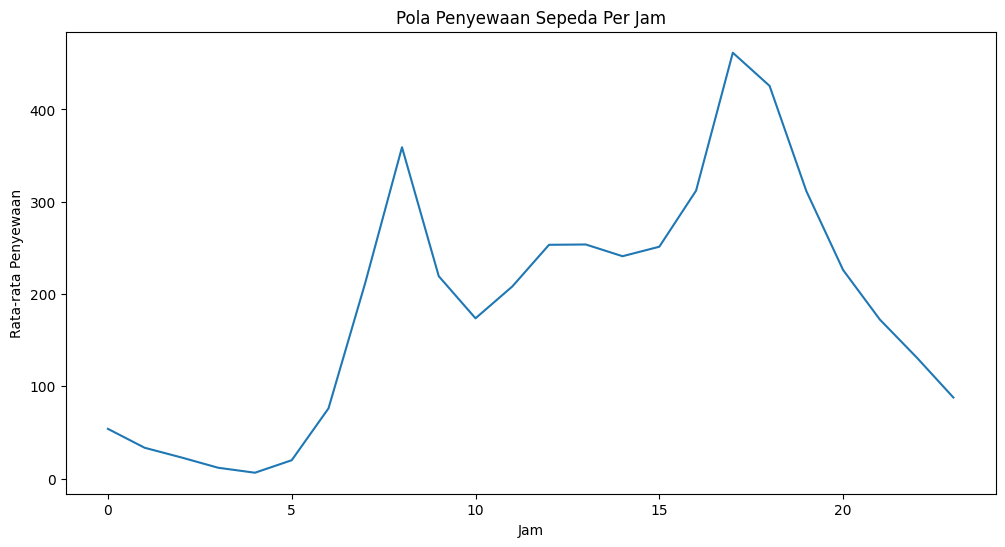

In [9]:
# Pola harian
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=day_data)
plt.title("Pola Penyewaan Sepeda Harian")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.show()

# Pola per jam
hourly_avg = hour_data.groupby('hr')['cnt'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg)
plt.title("Pola Penyewaan Sepeda Per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.show()


**Insight:**
- Penyewaan sepeda harian menunjukkan tren musiman.
- Penyewaan per jam memuncak pada jam sibuk (pagi dan sore).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor apa saja yang memengaruhi jumlah penyewaan sepeda?

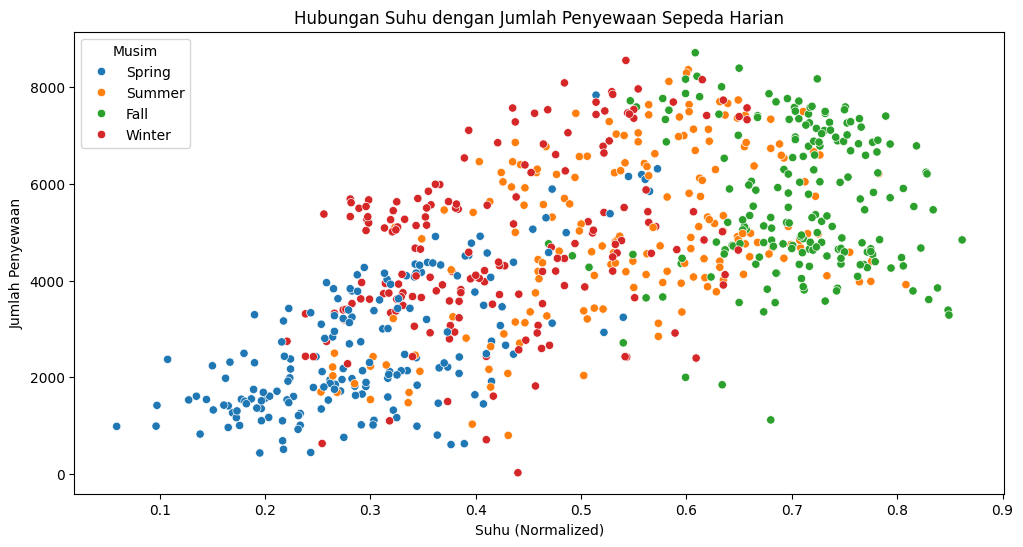

In [11]:
# Hubungan suhu dengan penyewaan
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', hue='season_label', data=day_data)
plt.title("Hubungan Suhu dengan Jumlah Penyewaan Sepeda Harian")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Musim")
plt.show()


### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan waktu?

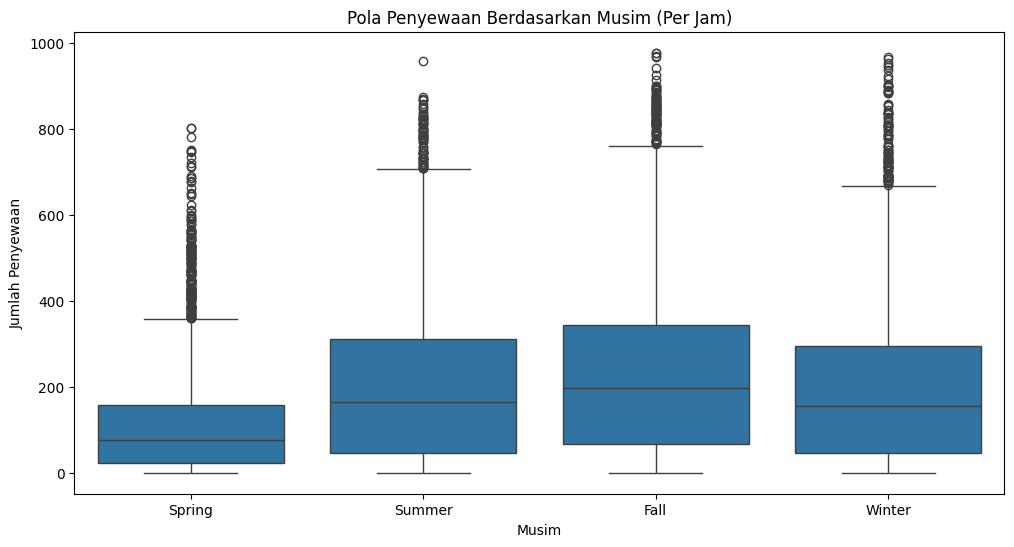

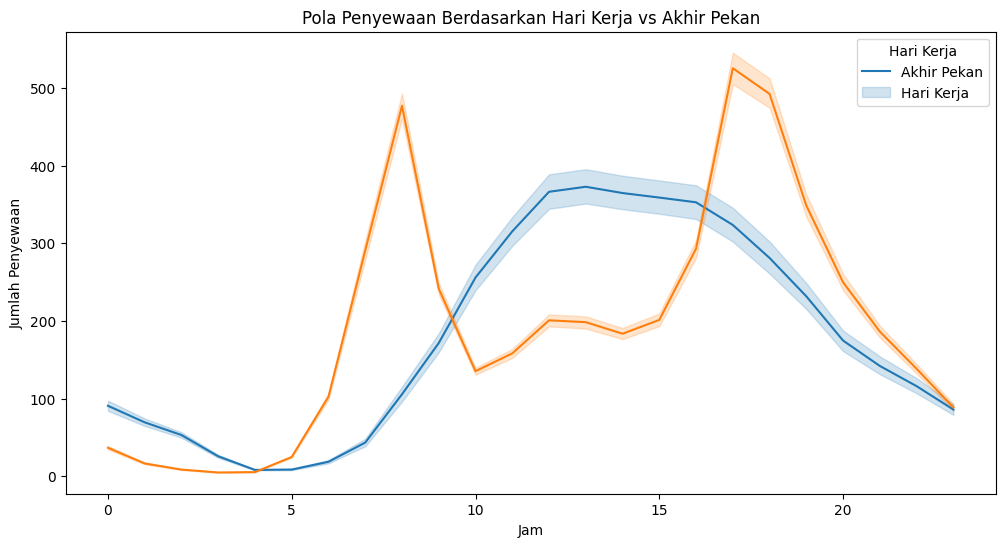

In [12]:
# Pola penyewaan berdasarkan musim
plt.figure(figsize=(12, 6))
sns.boxplot(x='season_label', y='cnt', data=hour_data)
plt.title("Pola Penyewaan Berdasarkan Musim (Per Jam)")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()

# Pola penyewaan berdasarkan hari kerja
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=hour_data)
plt.title("Pola Penyewaan Berdasarkan Hari Kerja vs Akhir Pekan")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Hari Kerja", labels=["Akhir Pekan", "Hari Kerja"])
plt.show()


**Insight:**
- Suhu memengaruhi penyewaan, dengan puncak pada musim panas.
- Penyewaan meningkat pada jam sibuk di hari kerja dan lebih merata pada akhir pekan.


## Analisis Lanjutan (Opsional)

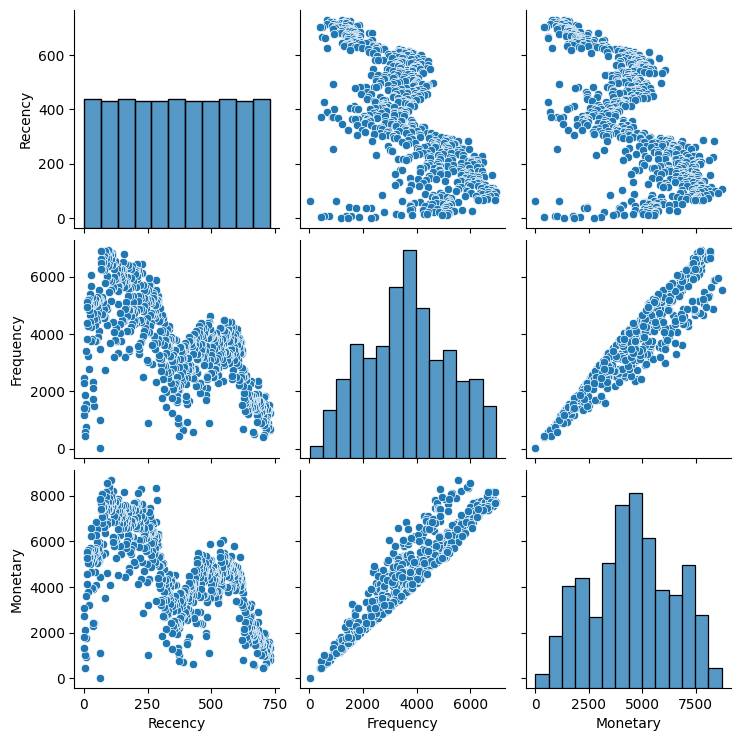

In [15]:
# RFM Analysis untuk pengguna terdaftar
day_data['Recency'] = 731 - day_data['instant']
day_data['Frequency'] = day_data['registered']
day_data['Monetary'] = day_data['cnt']

sns.pairplot(day_data[['Recency', 'Frequency', 'Monetary']])
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Faktor utama yang memengaruhi penyewaan sepeda adalah musim, suhu, dan kondisi cuaca. Penyewaan lebih tinggi pada suhu hangat dan cuaca cerah.
- Conclution pertanyaan 2: Pola penyewaan per jam menunjukkan puncak pada jam sibuk di hari kerja, sementara pada akhir pekan penyewaan lebih merata sepanjang hari.